## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combo_df = pd.merge(mouse_metadata, study_results, on = ["Mouse ID", "Mouse ID"], how = "outer")
combo_df.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = len(combo_df['Mouse ID'].unique())
print(f"There are {total_mice} mice in the study")

There are 249 mice in the study


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

grouped_df = combo_df.groupby(['Mouse ID', 'Timepoint'])
grouped_df = pd.DataFrame(grouped_df)
grouped_df

,0,1
0,"(a203, 0)",Mouse ID Drug Regimen Sex Age_months ...
1,"(a203, 5)",Mouse ID Drug Regimen Sex Age_months ...
2,"(a203, 10)",Mouse ID Drug Regimen Sex Age_months ...
3,"(a203, 15)",Mouse ID Drug Regimen Sex Age_months ...
4,"(a203, 20)",Mouse ID Drug Regimen Sex Age_months ...
...,...,...
1883,"(z969, 25)",Mouse ID Drug Regimen Sex Age_months ...
1884,"(z969, 30)",Mouse ID Drug Regimen Sex Age_months ...
1885,"(z969, 35)",Mouse ID Drug Regimen Sex Age_months ...
1886,"(z969, 40)",Mouse ID Drug Regimen Sex Age_months ...


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dropped_df = pd.concat([combo_df, combo_df]).drop_duplicates(keep = False)
dropped_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dupless_df = combo_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = "first")
dupless_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice2 = len(dupless_df['Mouse ID'].unique())
print(total_mice2)

249


In [7]:
print(f"Before cleaning the data set, there were {len(combo_df)} lines of data")
print(f"After removing duplicates, there are {len(dupless_df)} lines of data")

Before cleaning the data set, there were 1893 lines of data
After removing duplicates, there are 1888 lines of data


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = dupless_df.groupby('Drug Regimen')

summary_tab = regimen_df.agg({"Tumor Volume (mm3)" : ['mean', 'median', 'var', 'std', 'sem']})

summary_tab
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

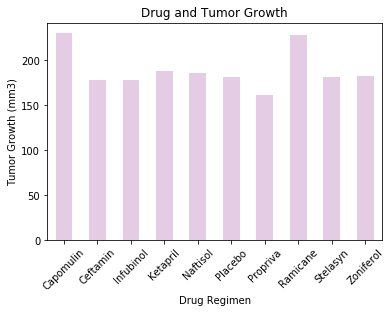

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

num_of_meas = combo_df.groupby("Drug Regimen").count()["Mouse ID"]

num_of_meas.plot(kind = "bar", color = "purple", alpha = 0.2)

plt.title("Drug and Tumor Growth")
plt.ylabel("Tumor Growth (mm3)")
plt.xticks(rotation = 45)

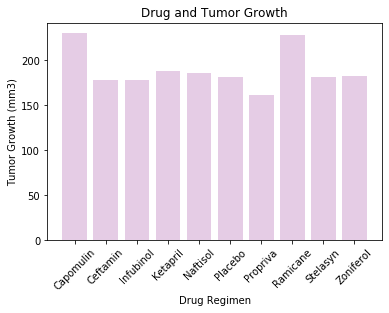

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(num_of_meas.index.values, num_of_meas.values, color = "purple", alpha = 0.2)

plt.title("Drug and Tumor Growth")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Growth (mm3)")
plt.xticks(rotation = 45)
plt.show()

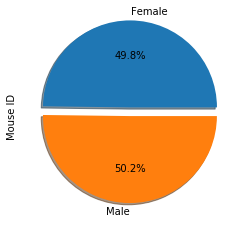

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_sex = combo_df.groupby("Sex").nunique()["Mouse ID"]
explode = (0.1,0)

mice_sex.plot(kind = "pie", shadow = True, explode = explode, autopct = "%1.1f%%")


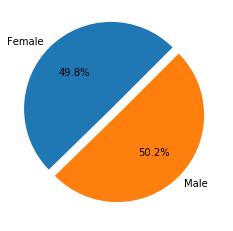

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mice_sex, labels = mice_sex.index.values, explode = explode, autopct = "%1.1f%%", startangle = 45)
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

ftum_df = dupless_df.loc[(dupless_df['Drug Regimen'] == 'Capomulin')
                        | (dupless_df['Drug Regimen'] == 'Ramicane')
                        | (dupless_df['Drug Regimen'] == 'Infubinol')
                        | (dupless_df['Drug Regimen'] == 'Ceftamin'), :]
# Start by getting the last (greatest) timepoint for each mouse
ftum_df = ftum_df.sort_values('Timepoint', ascending = False)
ftum_df = ftum_df.drop_duplicates(subset = 'Mouse ID', keep = 'first')


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
dup_ftum_df = pd.merge(dupless_df, ftum_df, on = ['Mouse ID'], suffixes = (""," final"))

dup_ftum_df = dup_ftum_df[['Mouse ID','Drug Regimen','Sex','Age_months','Weight (g)','Timepoint','Tumor Volume (mm3)','Tumor Volume (mm3) final','Metastatic Sites']]

dup_ftum_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Tumor Volume (mm3) final,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,22.050126,0
1,k403,Ramicane,Male,21,16,5,38.825898,22.050126,0
2,k403,Ramicane,Male,21,16,10,35.014271,22.050126,1
3,k403,Ramicane,Male,21,16,15,34.223992,22.050126,1
4,k403,Ramicane,Male,21,16,20,32.997729,22.050126,1
...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,62.754451,2
810,z581,Infubinol,Female,24,25,30,56.286750,62.754451,2
811,z581,Infubinol,Female,24,25,35,58.628399,62.754451,3
812,z581,Infubinol,Female,24,25,40,60.053740,62.754451,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

dupless_df["Drug Regimen"].value_counts()
regimens =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tum_vols = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimens:
   
    volume = dup_ftum_df.loc[dup_ftum_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tum_vols.append(volume)
    quartiles = ftum_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    inq = q3 - q1

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    out_low = q1 - (1.5 * inq)
    out_high = q3 + (1.5 * inq)
    
    print(drug)
    print(f"Volumes lower than {out_low} could be outliers.")
    print(f"Volumes higher than {out_high} could also be outliers.")
    
    # add subset 
    outliers = ftum_df.loc[(ftum_df["Tumor Volume (mm3)"] < out_low) | (ftum_df["Tumor Volume (mm3)"] > out_high)]
    outliers
    
    # Determine outliers using upper and lower bounds
    

Capomulin
Volumes lower than 3.0739668737499812 could be outliers.
Volumes higher than 94.04403868375002 could also be outliers.
Ramicane
Volumes lower than 3.0739668737499812 could be outliers.
Volumes higher than 94.04403868375002 could also be outliers.
Infubinol
Volumes lower than 3.0739668737499812 could be outliers.
Volumes higher than 94.04403868375002 could also be outliers.
Ceftamin
Volumes lower than 3.0739668737499812 could be outliers.
Volumes higher than 94.04403868375002 could also be outliers.


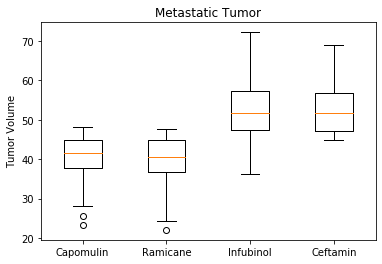

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Metastatic Tumor')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tum_vols, labels = regimens)
plt.show()


## Line and Scatter Plots

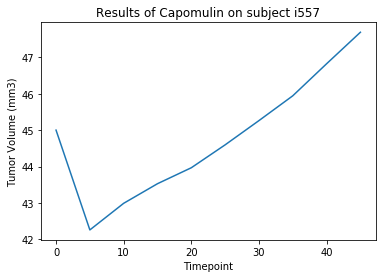

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185 = dupless_df.loc[dupless_df['Mouse ID'] =='i557']
xax = s185['Timepoint']
yax = s185['Tumor Volume (mm3)']

plt.plot(xax,yax)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Results of Capomulin on subject i557')
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

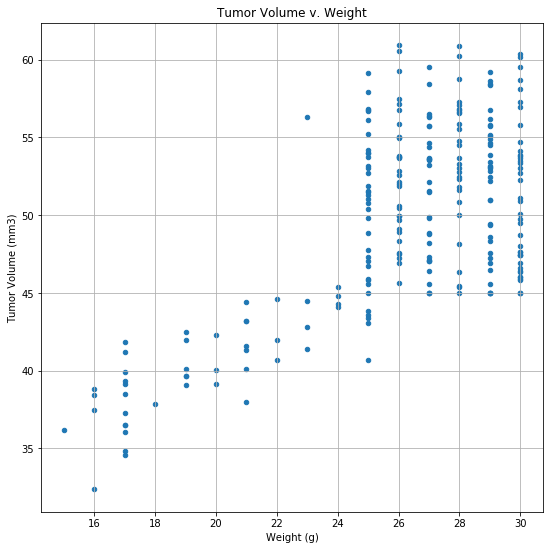

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cam_reg = dupless_df[['Mouse ID', 'Weight (g)','Tumor Volume (mm3)']]
cam_reg_gr = cam_reg.groupby(['Mouse ID'])
cam_reg_mean = cam_reg_gr.mean()

cam_reg_mean.plot(kind = 'scatter', x = 'Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize = (9,9), title = 'Tumor Volume v. Weight')
plt.show

## Correlation and Regression

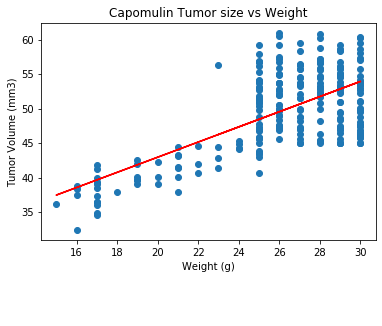

0.4341354674598181


In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_vals = cam_reg_mean['Weight (g)']
y_vals = cam_reg_mean['Tumor Volume (mm3)']
slope, intercept, r_value, p_value, std_err = st.linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_vals,y_vals)
plt.plot(x_vals,regress_vals,"r-")
plt.annotate(line_eq,(20, 20), fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Tumor size vs Weight')
plt.show()
print(r_value**2)